In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy
import seaborn as sns
import xlsxwriter

import math
from math import exp, sqrt, log

%matplotlib inline

from scipy import stats


import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [2]:
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as web
import pandas_datareader.data as web

In [3]:
import eikon as ek

In [4]:
creds = '443a647dd4514afb8c6e9577fa8f6e21d594620f'
ek.set_app_key(creds)

**Macroeconomics variables for the analysis:**

- Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (aUSCPI)
- Spot Crude Oil Price: West Texas Intermediate (WTC-)
- 5-Year, 5-Year Forward Inflation Expectation Rate (USUM5F=ECI)
- Retail Sales: Retail Trade and Food Services (USRSL=ECI)
- Industrial Production: Total Index (aUSIP7500G/CA)
- GDP growth monthly (aUSCBBKGPR)
- Unemployment Rate (USUNR=ECI)
- Federal Funds Effective Rate (aUSFEDFUND)
- UNITED STATES TREASURY, 10 Year Benchmark (US10YT=RR)

In [43]:
macrodata1 =['aUSCPI','USUM5F=ECI', 'USRSL=ECI', 'aUSIP7500G/CA', 'USUNR=ECI', 'aUSCBBKGPR','aUSFEDFUND'] 
macros1 = ek.get_timeseries(macrodata1, interval='monthly', start_date='2010-01-01',end_date='2020-12-31',)
macros1.head(10)

VALUE,aUSCPI,USUM5F=ECI,USRSL=ECI,aUSIP7500G/CA,USUNR=ECI,aUSCBBKGPR,aUSFEDFUND
Date,,,,,,,
2010-01-31,216.687,2.9,0.0,218.492775,9.8,1.285665,0.11
2010-02-28,216.741,2.7,0.3,219.203509,9.8,1.286249,0.13
2010-03-31,217.631,2.7,2.2,220.830560,9.9,3.534599,0.16
2010-04-30,218.009,2.7,0.8,221.660972,9.9,4.413216,0.20
2010-05-31,218.178,2.9,-0.9,224.734454,9.6,4.862711,0.20
2010-06-30,217.965,2.8,-0.2,225.180620,9.4,3.333359,0.18
2010-07-31,218.011,2.9,0.3,226.134383,9.4,2.748274,0.18
2010-08-31,218.312,2.8,0.6,226.905568,9.5,2.463007,0.19
2010-09-30,218.439,2.7,0.7,227.427850,9.5,3.036461,0.19


In [44]:
macrodata2 =['WTC-','US10YT=RR'] 
macros2 = ek.get_timeseries(macrodata2, 'CLOSE', interval='monthly', start_date='2010-01-01',end_date='2020-12-31',)
macros2.head(10)

CLOSE,WTC-,US10YT=RR
Date,,
2010-01-31,72.85,3.5882
2010-02-28,79.72,3.6192
2010-03-31,83.45,3.8334
2010-04-30,86.07,3.6590
2010-05-31,74.00,3.3033
2010-06-30,75.59,2.9347
2010-07-31,78.85,2.9052
2010-08-31,71.93,2.4700
2010-09-30,79.95,2.5116


In [45]:
macros3 = pd.concat([macros2, macros1], axis= 1) #Data Frames zusammenführen
macros3.head(10)

,WTC-,US10YT=RR,aUSCPI,USUM5F=ECI,USRSL=ECI,aUSIP7500G/CA,USUNR=ECI,aUSCBBKGPR,aUSFEDFUND
Date,,,,,,,,,
2010-01-31,72.85,3.5882,216.687,2.9,0.0,218.492775,9.8,1.285665,0.11
2010-02-28,79.72,3.6192,216.741,2.7,0.3,219.203509,9.8,1.286249,0.13
2010-03-31,83.45,3.8334,217.631,2.7,2.2,220.830560,9.9,3.534599,0.16
2010-04-30,86.07,3.6590,218.009,2.7,0.8,221.660972,9.9,4.413216,0.20
2010-05-31,74.00,3.3033,218.178,2.9,-0.9,224.734454,9.6,4.862711,0.20
2010-06-30,75.59,2.9347,217.965,2.8,-0.2,225.180620,9.4,3.333359,0.18
2010-07-31,78.85,2.9052,218.011,2.9,0.3,226.134383,9.4,2.748274,0.18
2010-08-31,71.93,2.4700,218.312,2.8,0.6,226.905568,9.5,2.463007,0.19
2010-09-30,79.95,2.5116,218.439,2.7,0.7,227.427850,9.5,3.036461,0.19


In [46]:
macros3.isnull().sum()

WTC-             0
US10YT=RR        0
aUSCPI           0
USUM5F=ECI       0
USRSL=ECI        0
aUSIP7500G/CA    0
USUNR=ECI        0
aUSCBBKGPR       0
aUSFEDFUND       0
dtype: int64

In [48]:
Assets = ek.get_symbology(['037833100','654106103', '580135101', '717081103', '30231G102'],from_symbol_type ='CUSIP',to_symbol_type='RIC')
AssetPrices = ek.get_timeseries(Assets.RIC.to_list(),
                       start_date='2010-01-01',end_date='2020-12-31', fields='CLOSE' , interval='monthly')
AssetPrices.head(10)

CLOSE,AAPL.O,NKE,MCD,PFE,XOM
Date,,,,,
2010-01-31,6.859386,15.9375,62.43,17.688728,64.43
2010-02-28,7.307850,16.9000,63.85,16.636505,65.00
2010-03-31,8.392849,18.3750,66.72,16.257325,66.98
2010-04-30,9.324634,18.9775,70.59,15.849707,67.77
2010-05-31,9.174277,18.0950,66.87,14.437263,60.46
2010-06-30,8.983205,16.8875,65.87,13.517753,57.07
2010-07-31,9.187491,18.4100,69.73,14.219235,59.68
2010-08-31,8.682134,17.5000,73.06,15.081869,59.11
2010-09-30,10.133918,20.0350,74.51,16.276284,61.79


In [49]:
AssetPrices.isnull().sum()

CLOSE
AAPL.O    0
NKE       0
MCD       0
PFE       0
XOM       0
dtype: int64

In [50]:
AssetPrices.describe()

CLOSE,AAPL.O,NKE,MCD,PFE,XOM
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,34.088388,52.377405,125.384318,28.954227,78.705909
std,25.222987,28.015939,45.220986,7.287106,14.697221
min,6.859386,15.937500,62.430000,13.517753,32.620000
25%,17.307108,27.013750,93.727500,23.570752,73.835000
50%,27.123750,50.505000,101.060000,30.443382,81.820000
75%,42.271875,68.262500,163.010000,34.059808,87.382500
max,132.690000,141.470000,219.490000,43.823682,102.410000


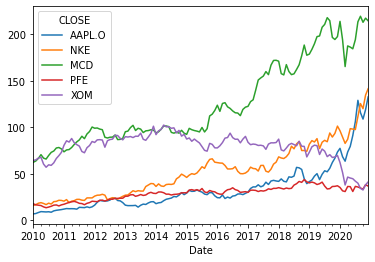

In [51]:
AssetPrices.plot()

In [ ]:
import statsmodels.api as sm
y = AssetPrices['AAPL.O']
x = macros3[['CPIAUCSL_GR', 'WTISPLC_GR', 'T5YIFRM_GR', 'MRTSSM44X72USS_GR', 'INDPRO_GR', 'A939RX0Q048SBEA_GR', 'UNRATE_GR', 'FEDFUNDS_GR', 'GS10_GR']]
x = sm.add_constant(x)
model = sm.OLS(y,x, missing = 'drop') 
results = model.fit()
print(results.summary())

In [52]:
import statsmodels.api as sm
y = AssetPrices['AAPL.O']
x = macros3
x = sm.add_constant(x)
model = sm.OLS(y,x, missing = 'drop') 
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 AAPL.O   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     113.0
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           7.72e-55
Time:                        16:41:09   Log-Likelihood:                -465.42
No. Observations:                 132   AIC:                             950.8
Df Residuals:                     122   BIC:                             979.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -434.6986     59.692     -7.282